In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fruits.csv")

In [3]:
df

,target,weight,color
0,apple,91.234258,red
1,apple,125.134927,red
2,orange,101.313929,orange
3,apple,102.218174,green
4,apple,89.982126,red
...,...,...,...
9995,apple,81.061794,red
9996,orange,90.426004,orange
9997,orange,92.361074,orange
9998,apple,126.969072,green


In [4]:
for col in df.columns:
    print(col, pd.unique(df[col]))

target ['apple' 'orange']
weight [ 91.23425822 125.13492658 101.31392927 ...  92.36107428 126.9690721
  96.57621677]
color ['red' 'orange' 'green']


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["target"] = le.fit_transform(df.target)
#df.color = le.fit_transform(df.color)
color = pd.get_dummies(df.color)
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=5, encode="onehot-dense")
weight = kb.fit_transform(df[["weight"]])

In [6]:
weight

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [7]:
df = pd.concat([df, color, pd.DataFrame(weight)], axis = 1)

<Axes: >

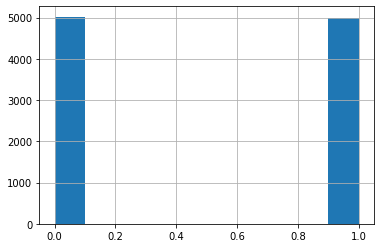

In [8]:
df.target.hist()

<Axes: >

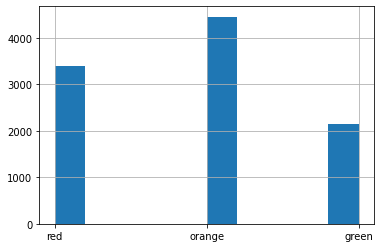

In [9]:
df.color.hist()

<Axes: >

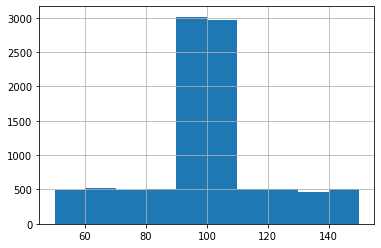

In [10]:
df.weight.hist()

Text(0, 0.5, 'target')

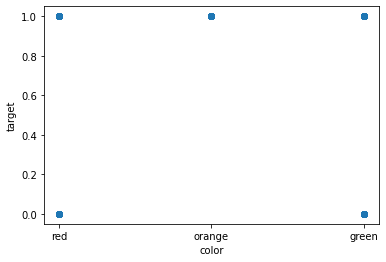

In [11]:
plt.plot(df.color, df.target, "o")
plt.xlabel("color")
plt.ylabel("target")

Text(0, 0.5, 'target')

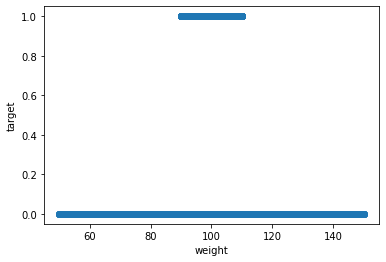

In [12]:
plt.plot(df.weight, df.target, "o")
plt.xlabel("weight")
plt.ylabel("target")

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop(["target", "weight", "color"], axis =1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [16]:
pred_train = clf.predict_proba(X_train)[:,1]
pred_test = clf.predict_proba(X_test)[:,1]

In [17]:
from sklearn.metrics import roc_auc_score
score_train = roc_auc_score(y_train, pred_train)
score_test = roc_auc_score(y_test, pred_test)
print(score_train, score_test)

0.9899762967715491 0.9890440771349862


In [ ]:
df